Cardiovascular diseases

In [1]:
%%capture
!pip install numpy pandas matplotlib seaborn scikit-learn plotly

In [2]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from collections import Counter

In [3]:
heart = pd.read_csv('heart.csv', index_col=None, na_values=['NaN'],)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.shape

(918, 12)

In [5]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
string_col = heart.select_dtypes(include="object").columns
heart[string_col]=heart[string_col].astype("string")
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
string_col=heart.select_dtypes("string").columns.to_list()
num_col=heart.columns.to_list()
for col in string_col:
    num_col.remove(col)
px.imshow(heart[num_col].corr(),title="Correlation Plot")

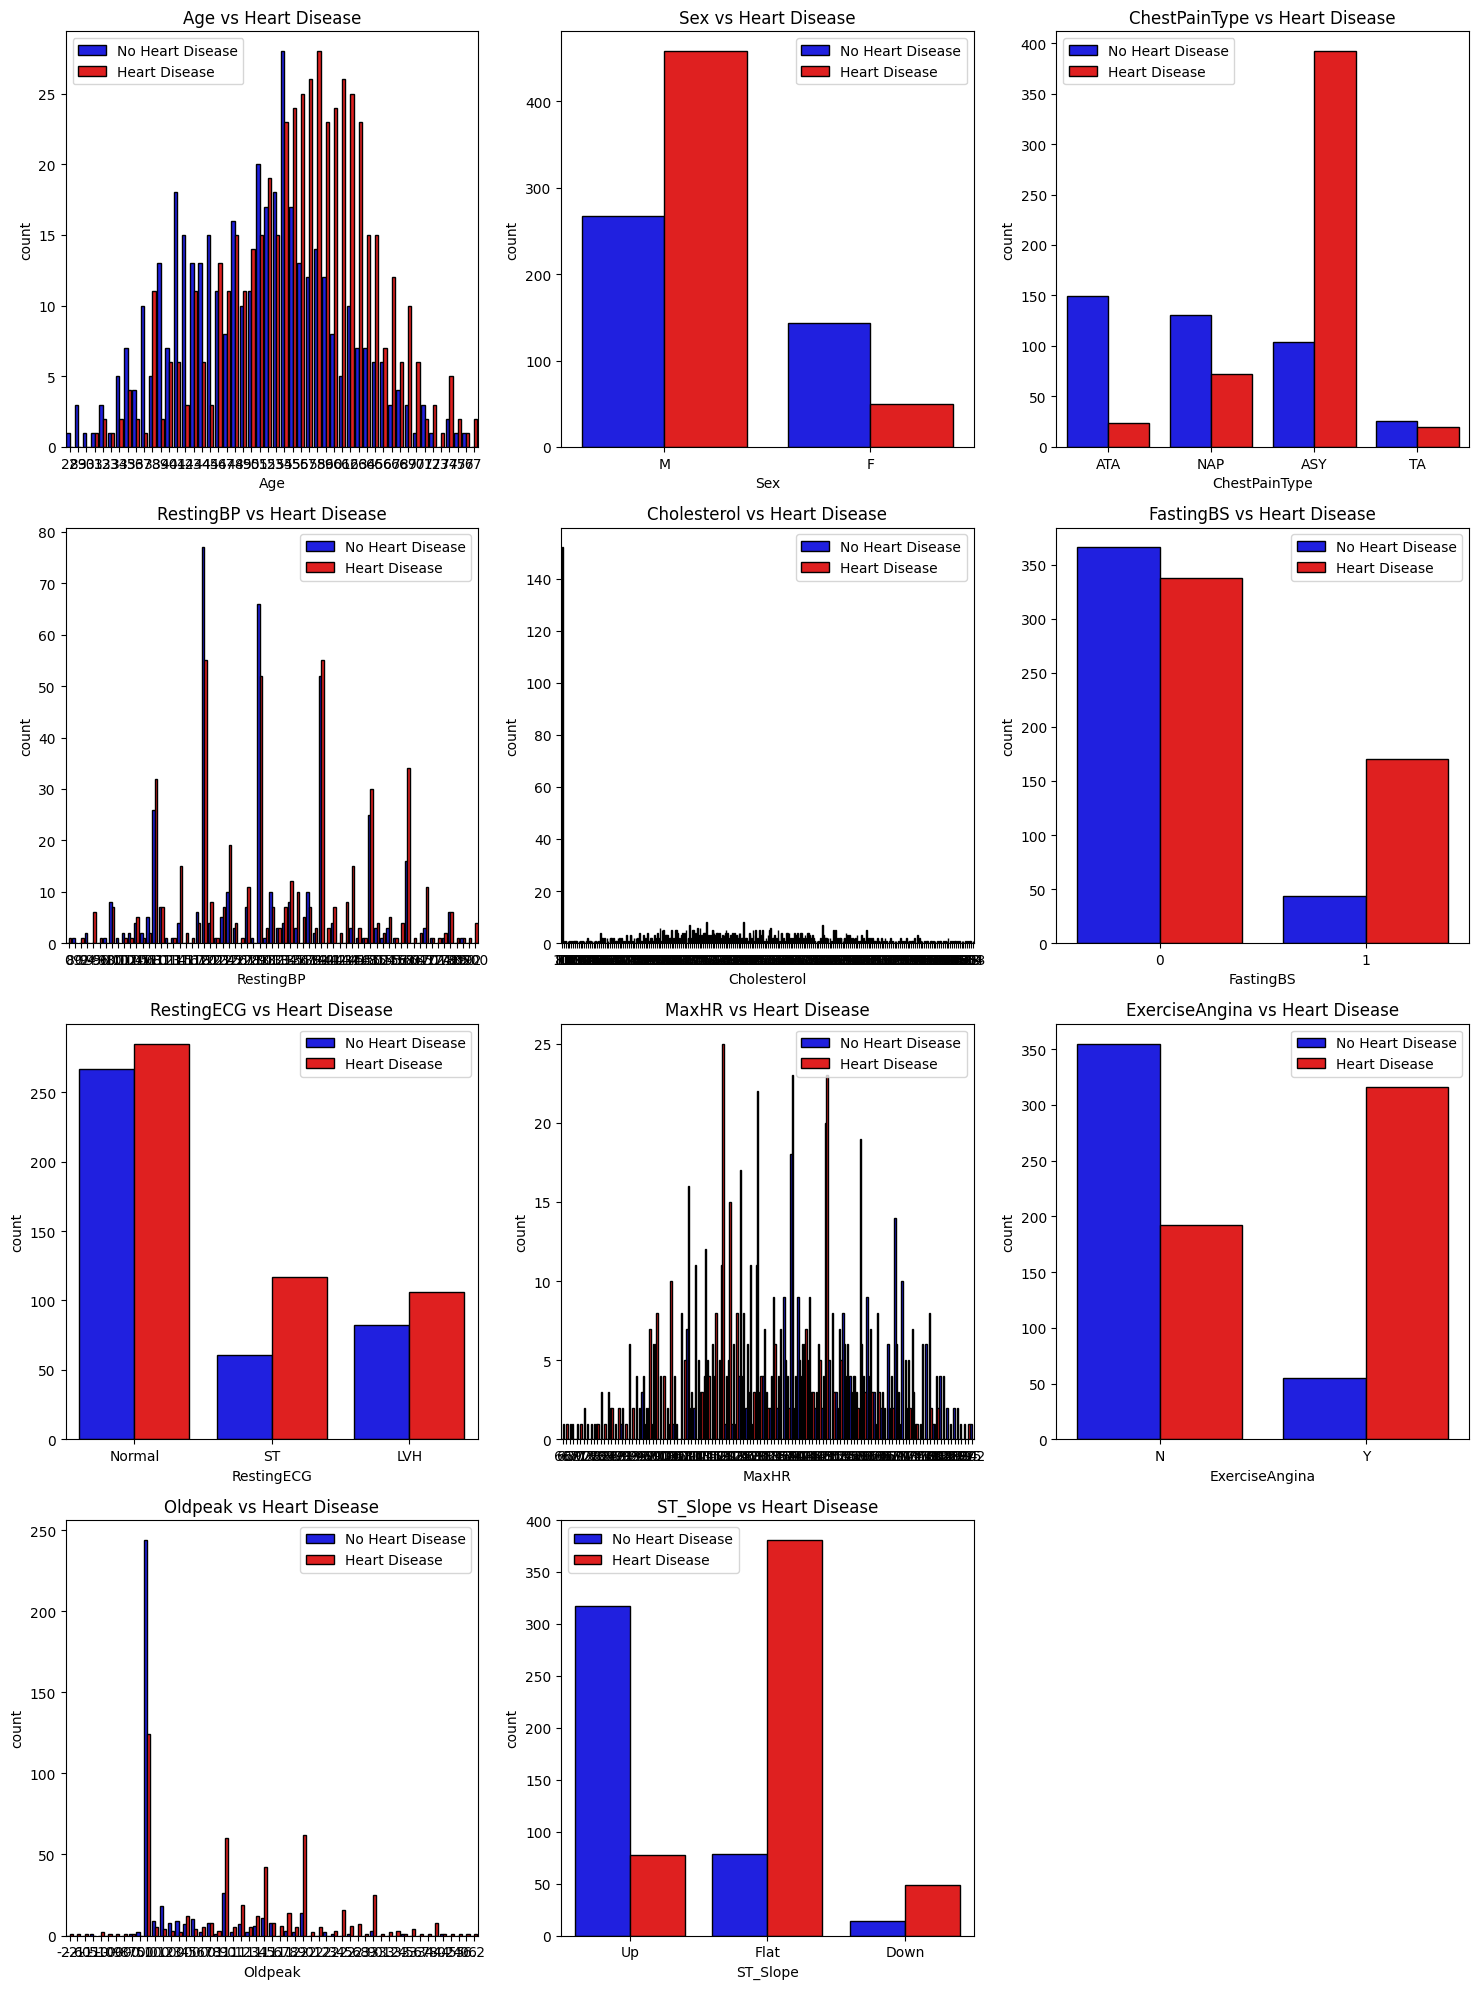

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Iterate over the columns and create subplots
for i, col in enumerate(heart.columns[:-1], 1):
    plt.subplot(4, 3, i)
    plt.title(f"{col} vs Heart Disease")
    sns.countplot(x=col, data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.tight_layout()

# Remove the last subplot
fig.delaxes(ax[3, 2])

plt.show()

In [9]:
target = heart.iloc[:, -1]   # Last column as the target variable 
feature = heart.iloc[:, :-1]  # All columns except the last one as the features 

In [10]:
#Label Encoding for categorical columns
le = preprocessing.LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    feature[col] = le.fit_transform(feature[col])

In [11]:
minmax_scaler = preprocessing.MinMaxScaler()

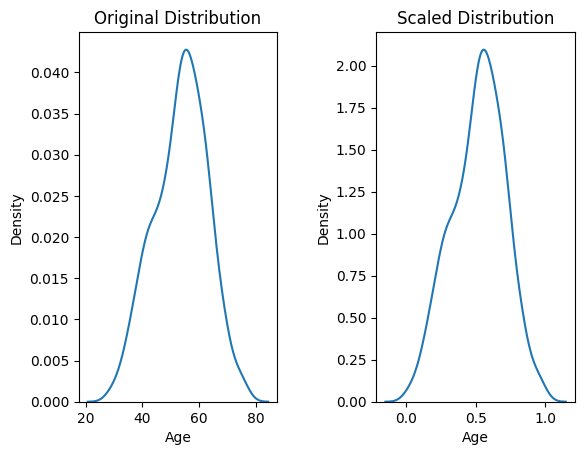

In [12]:
fig, (original, scaled) = plt.subplots(1, 2)
sns.kdeplot(feature['Age'], label='Age', ax=original)
original.set_title('Original Distribution')

# Scale the Age feature
feature['Age'] = minmax_scaler.fit_transform(feature[['Age']])

# Plot the scaled distribution of the Age feature
sns.kdeplot(feature['Age'], label='Age', ax=scaled)
scaled.set_title('Scaled Distribution')

plt.subplots_adjust(wspace=0.5)
plt.show()

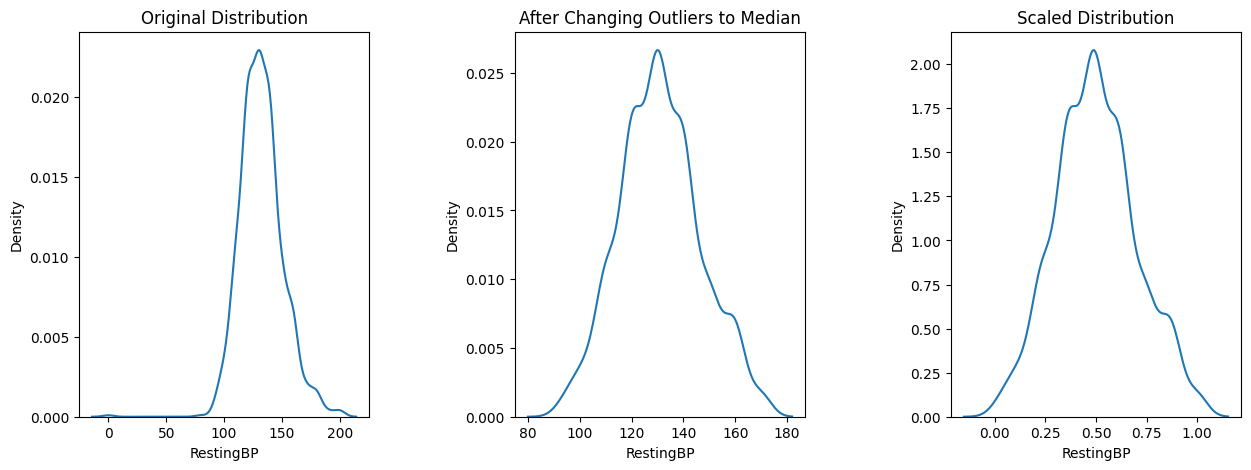

In [13]:
# Create subplots for original and scaled distributions
fig, (original, after_outlier, scaled) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the original distribution
sns.kdeplot(feature['RestingBP'], label='RestingBP', ax=original)
original.set_title('Original Distribution')

# Identify and change outliers to median
median_value = feature['RestingBP'].median()
Q1 = feature['RestingBP'].quantile(0.25)
Q3 = feature['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

feature['RestingBP'] = feature['RestingBP'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Plot the distribution after changing outliers to median
sns.kdeplot(feature['RestingBP'], label='RestingBP', ax=after_outlier)
after_outlier.set_title('After Changing Outliers to Median')

feature['RestingBP'] = minmax_scaler.fit_transform(feature[['RestingBP']])

# Plot the scaled distribution of the 'RestingBP' feature
sns.kdeplot(feature['RestingBP'], label='RestingBP', ax=scaled)
scaled.set_title('Scaled Distribution')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plots
plt.show()


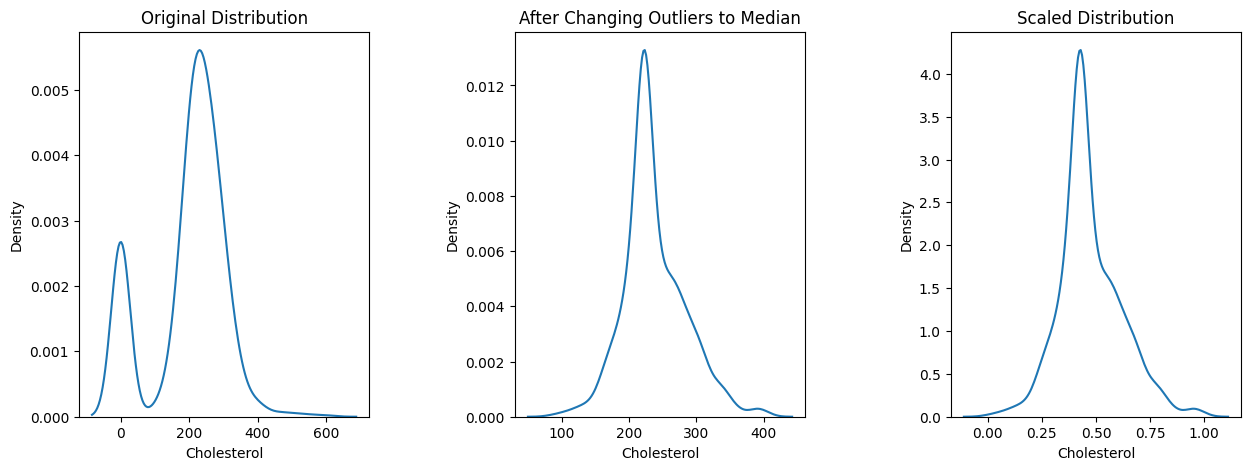

In [14]:
# Create subplots for original and scaled distributions
fig, (original, after_outlier, scaled) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the original distribution
sns.kdeplot(feature['Cholesterol'], label='Cholesterol', ax=original)
original.set_title('Original Distribution')

# Identify and change outliers to median
median_value = feature['Cholesterol'].median()
Q1 = feature['Cholesterol'].quantile(0.25)
Q3 = feature['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

feature['Cholesterol'] = feature['Cholesterol'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Plot the distribution after changing outliers to median
sns.kdeplot(feature['Cholesterol'], label='Cholesterol', ax=after_outlier)
after_outlier.set_title('After Changing Outliers to Median')

feature['Cholesterol'] = minmax_scaler.fit_transform(feature[['Cholesterol']])

# Plot the scaled distribution of the 'Cholesterol' feature
sns.kdeplot(feature['Cholesterol'], label='Cholesterol', ax=scaled)
scaled.set_title('Scaled Distribution')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plots
plt.show()

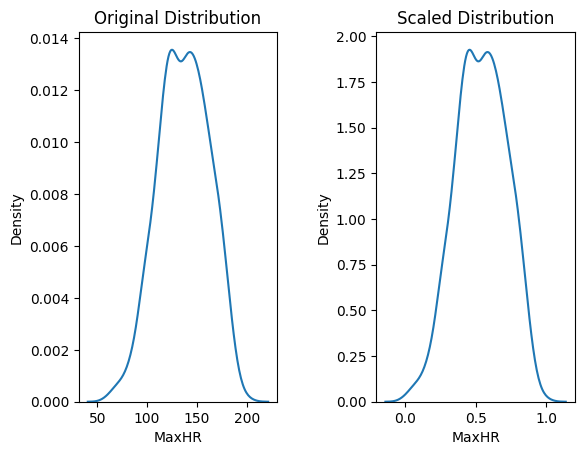

In [15]:
fig, (original, scaled) = plt.subplots(1, 2)
sns.kdeplot(feature['MaxHR'], label='MaxHR', ax=original)
original.set_title('Original Distribution')

# Scale the MaxHR feature
feature['MaxHR'] = minmax_scaler.fit_transform(feature[['MaxHR']])

# Plot the scaled distribution of the MaxHR feature
sns.kdeplot(feature['MaxHR'], label='MaxHR', ax=scaled)
scaled.set_title('Scaled Distribution')

plt.subplots_adjust(wspace=0.5)
plt.show()

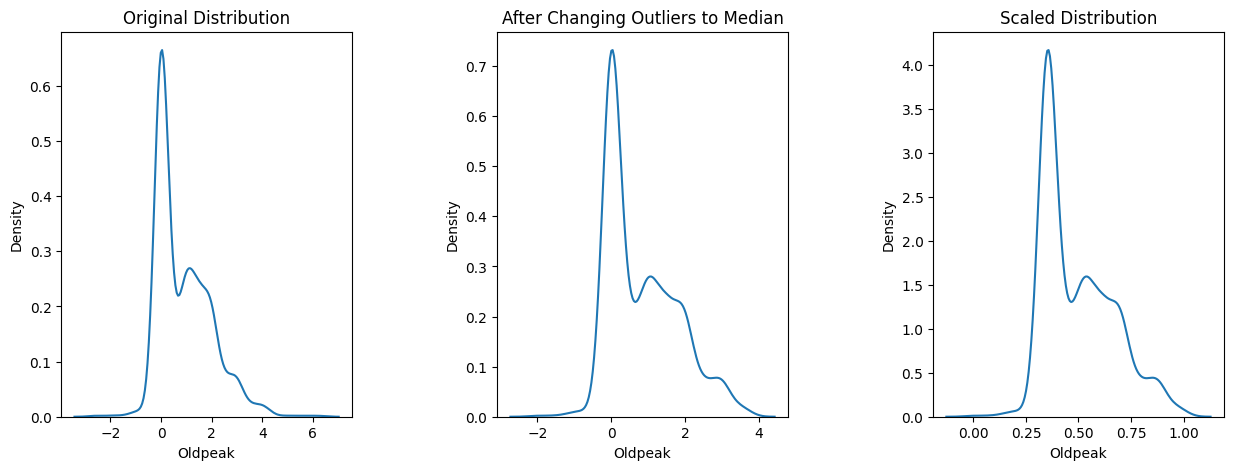

In [16]:
# Create subplots for original and scaled distributions
fig, (original, after_outlier, scaled) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the original distribution
sns.kdeplot(feature['Oldpeak'], label='Oldpeak', ax=original)
original.set_title('Original Distribution')

# Identify and change outliers to median
median_value = feature['Oldpeak'].median()
Q1 = feature['Oldpeak'].quantile(0.25)
Q3 = feature['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

feature['Oldpeak'] = feature['Oldpeak'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Plot the distribution after changing outliers to median
sns.kdeplot(feature['Oldpeak'], label='Oldpeak', ax=after_outlier)
after_outlier.set_title('After Changing Outliers to Median')

feature['Oldpeak'] = minmax_scaler.fit_transform(feature[['Oldpeak']])

# Plot the scaled distribution of the 'Oldpeak' feature
sns.kdeplot(feature['Oldpeak'], label='Oldpeak', ax=scaled)
scaled.set_title('Scaled Distribution')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plots
plt.show()

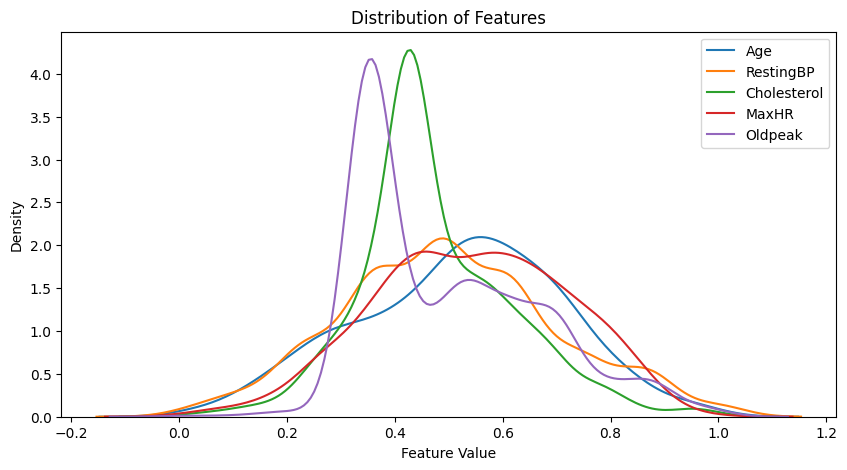

In [17]:
plt.figure(figsize=(10, 5))
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for column in columns:
    sns.kdeplot(feature[column], label=column)

plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.title('Distribution of Features')
plt.legend()
plt.show()

In [18]:
##one hot encoding for chest pain type, fasting blood sugar, resting ecg, st slope
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_name)], remainder='passthrough')
feature = np.array(ct.fit_transform(feature))

In [19]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=50)

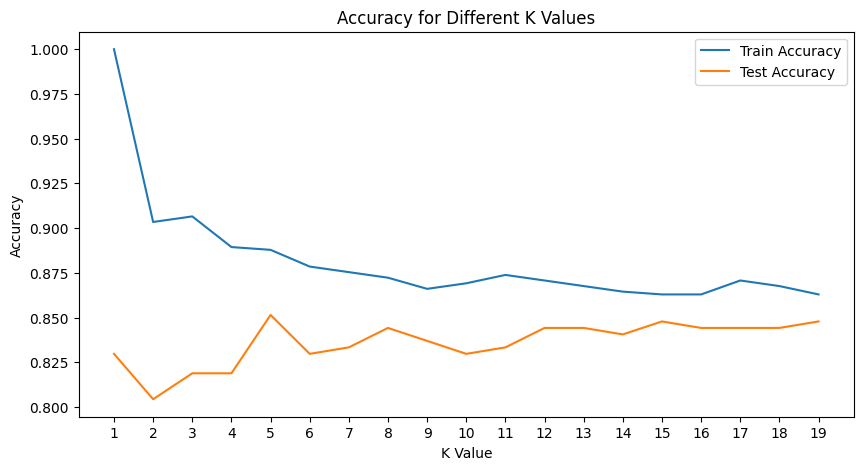

In [20]:
#knn model with accuracy score for different k values for both train and test set and plotting the graph
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = range(1, 20, 1)
train_accuracy = []
test_accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(feature_train, target_train)
    train_pred = knn.predict(feature_train)
    train_accuracy.append(accuracy_score(target_train, train_pred))
    test_pred = knn.predict(feature_test)
    test_accuracy.append(accuracy_score(target_test, test_pred))

plt.figure(figsize=(10, 5))
plt.plot(k_range, train_accuracy, label='Train Accuracy')
plt.plot(k_range, test_accuracy, label='Test Accuracy')
plt.xticks(k_range)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.legend()
plt.show()

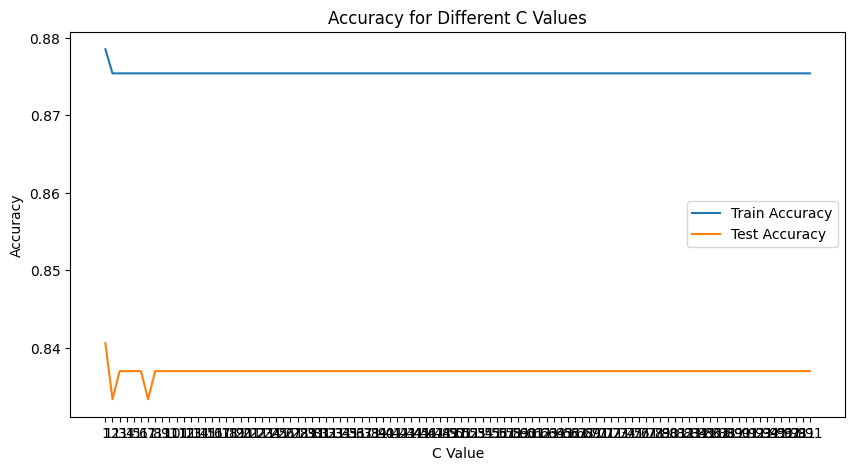

In [21]:
#using SVM model with accuracy score for different C values for both train and test set and plotting the graph
from sklearn.svm import SVC
c_range = range(1, 1000, 10)
train_accuracy = []
test_accuracy = []
for c in c_range:
    svm = SVC(C=c,kernel='linear')
    svm.fit(feature_train, target_train)
    train_pred = svm.predict(feature_train)
    train_accuracy.append(accuracy_score(target_train, train_pred))
    test_pred = svm.predict(feature_test)
    test_accuracy.append(accuracy_score(target_test, test_pred))

plt.figure(figsize=(10, 5))
plt.plot(c_range, train_accuracy, label='Train Accuracy')
plt.plot(c_range, test_accuracy, label='Test Accuracy')
plt.xticks(c_range)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different C Values')
plt.legend()
plt.show()


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100),learning_rate_init=0.001, max_iter=1000, alpha=0.0001, solver= 'adam', verbose=50, random_state=21, tol=1e-4)
mlp.fit(feature_train, target_train)
mlp_pred = mlp.predict(feature_test)
print('Accuracy Score: ', accuracy_score(target_test, mlp_pred))
print('Confusion Matrix: \n', confusion_matrix(target_test, mlp_pred))
print('Classification Report: \n', classification_report(target_test, mlp_pred))

Iteration 1, loss = 0.65548347
Iteration 2, loss = 0.58814054
Iteration 3, loss = 0.53332827
Iteration 4, loss = 0.47217731
Iteration 5, loss = 0.42414493
Iteration 6, loss = 0.38855053
Iteration 7, loss = 0.36906632
Iteration 8, loss = 0.36086751
Iteration 9, loss = 0.35545255
Iteration 10, loss = 0.34788169
Iteration 11, loss = 0.34362513
Iteration 12, loss = 0.33727074
Iteration 13, loss = 0.33513692
Iteration 14, loss = 0.33295028
Iteration 15, loss = 0.32902546
Iteration 16, loss = 0.32605601
Iteration 17, loss = 0.32324553
Iteration 18, loss = 0.32191323
Iteration 19, loss = 0.31757710
Iteration 20, loss = 0.32113286
Iteration 21, loss = 0.32079988
Iteration 22, loss = 0.31441122
Iteration 23, loss = 0.30776486
Iteration 24, loss = 0.31436920
Iteration 25, loss = 0.30671601
Iteration 26, loss = 0.30492134
Iteration 27, loss = 0.30318046
Iteration 28, loss = 0.30047079
Iteration 29, loss = 0.30206651
Iteration 30, loss = 0.29624614
Iteration 31, loss = 0.29630100
Iteration 32, los